In [1]:
import numpy as np

In [2]:
#Get saved data set
target=np.load('preprocessed_target_for_face_mask.npy')
data=np.load('preprocessed_data_for_face_mask.npy')

In [3]:
print(data.shape)
print(target.shape)

(4541, 100, 100, 1)
(4541, 2)


In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [5]:
model = Sequential()

#Add First CNN layer with activation function relu and maxpool layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:],padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Add First CNN layer with activation function relu and maxpool layer
model.add(Conv2D(100,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten 3d array to 1d array for dense neural network
model.add(Flatten())

#Use dropout to avoid overfitting
model.add(Dropout(0.5))

#First hidden layer with 64 neurons
model.add(Dense(64,activation='relu'))

#output layer with two outputs 
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [6]:
#split given dataset into testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data,target,test_size=0.2)
# 80-20 percent split

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3632, 100, 100, 1)
(909, 100, 100, 1)
(3632, 2)
(909, 2)


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 200)     2000      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 62500)            

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')
history=model.fit(x_train,y_train,epochs=25,callbacks=[checkpoint],validation_split=0.2)

Train on 2905 samples, validate on 727 samples
Epoch 1/25
2905/2905 [==============================] - 59s 20ms/step - loss: 0.6290 - accuracy: 0.6448 - val_loss: 0.5149 - val_accuracy: 0.7153
Epoch 2/25
2905/2905 [==============================] - 50s 17ms/step - loss: 0.4701 - accuracy: 0.7749 - val_loss: 0.3277 - val_accuracy: 0.8556
Epoch 3/25
2905/2905 [==============================] - 50s 17ms/step - loss: 0.3463 - accuracy: 0.8444 - val_loss: 0.3230 - val_accuracy: 0.8666
Epoch 4/25
2905/2905 [==============================] - 50s 17ms/step - loss: 0.2924 - accuracy: 0.8723 - val_loss: 0.3219 - val_accuracy: 0.8638
Epoch 5/25
2905/2905 [==============================] - 50s 17ms/step - loss: 0.2265 - accuracy: 0.9102 - val_loss: 0.2364 - val_accuracy: 0.9078
Epoch 6/25
2905/2905 [==============================] - 50s 17ms/step - loss: 0.2139 - accuracy: 0.9119 - val_loss: 0.2028 - val_accuracy: 0.9188
Epoch 7/25
2905/2905 [==============================] - 50s 17ms/step - loss:

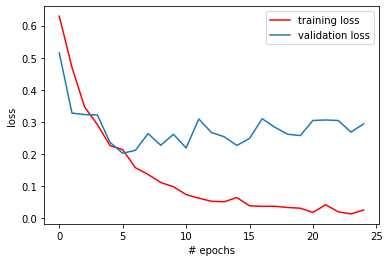

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

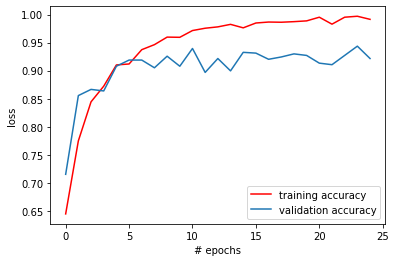

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(x_test)
predictions

array([[6.9242716e-02, 9.3075728e-01],
       [9.9993300e-01, 6.6961205e-05],
       [9.9998868e-01, 1.1313618e-05],
       ...,
       [5.6931329e-01, 4.3068668e-01],
       [1.4118633e-01, 8.5881370e-01],
       [9.9975485e-01, 2.4519107e-04]], dtype=float32)

In [13]:
score = model.evaluate(x_test,y_test)
print(score)

909/909 [==============================] - 4s 5ms/step
[0.24937418087644808, 0.9317931532859802]


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 200)     2000      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 200)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 62500)            